In [3]:
import numpy as np
import os
import cv2
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [6]:
def sh(im):
    plt.imshow(im)

### Training U-net

Using TensorFlow backend.
  4%|▎         | 2/56 [00:00<00:03, 14.64it/s]

Verifying training dataset


100%|██████████| 56/56 [00:03<00:00, 14.87it/s]


Dataset verified! 
Epoch 1/2
13/13 [==============================] - 463s 36s/step - loss: 0.4884 - accuracy: 0.8689

Epoch 00001: saving model to segmentation_data/vgg_unet_1/vgg_unet.00001
Epoch 2/2
13/13 [==============================] - 421s 32s/step - loss: 0.1783 - accuracy: 0.9791

Epoch 00002: saving model to segmentation_data/vgg_unet_1/vgg_unet.00002


20it [01:19,  3.97s/it]

{'frequency_weighted_IU': 0.9679512492330054, 'mean_IU': 0.5341527223403273, 'class_wise_IU': array([0.98144617, 0.21634829, 0.93709691, 0.00171953])}


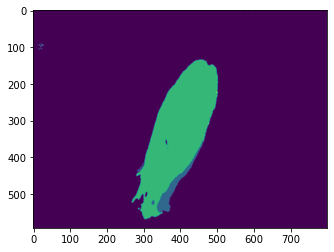

In [3]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=4 ,  input_height=1184, input_width=1600  )

model.train(
    train_images =  "segmentation_data/imgs/imgs_train/",
    train_annotations = "segmentation_data/labels_changed/labels_train/",
    checkpoints_path = "segmentation_data/vgg_unet_1/vgg_unet" , epochs=2
)

out = model.predict_segmentation(
    inp="segmentation_data/imgs/imgs_test/p1_A3.png",
    out_fname="/segmentation_data/imgs/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="segmentation_data/imgs/imgs_test/"  , 
                                  annotations_dir="segmentation_data/labels_changed/labels_test/") )

### Testing

In [4]:
from keras_segmentation.predict import predict_multiple

predict_multiple( 
checkpoints_path="segmentation_data/vgg_unet_1/vgg_unet", 
inp_dir="segmentation_data/imgs/imgs_test/", 
out_dir="segmentation_data/results/" 
)

  0%|          | 0/20 [00:00<?, ?it/s]

loaded weights  segmentation_data/vgg_unet_1/vgg_unet.00002


100%|██████████| 20/20 [01:19<00:00,  3.95s/it]


[array([[0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

### dice coeff

In [62]:
tr = "segmentation_data/results/p1_D2.png"
pr = "segmentation_data/labels/labels_test/p1_D2.png"
trr = cv2.imread(tr)
prr = cv2.imread(pr)

In [66]:
trr[np.all(trr == (132, 248, 207), axis=-1)] = (0, 128, 0) #green
trr[np.all(trr == (155, 244, 183), axis=-1)] = (0, 0, 128) #blue
trr[np.all(trr == (197, 215, 20), axis=-1)] = (0,0,0) #black

In [71]:
#load images
y_pred = trr
y_true = prr

# Dice similarity function
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

dice_score = dice(y_pred, y_true, k = (0,0,128)) #255 in my case, can be 1 
print ("Dice Similarity: {}".format(dice_score))

Dice Similarity: 0.9565246147251903
